<a href="https://colab.research.google.com/github/Sahilmandalwar/campusx_machine_learning_code/blob/main/ML_013_RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [5]:
df = load_diabetes()

In [7]:
X = df.data

In [8]:
y = df.target

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
lr.intercept_ , lr.coef_

(np.float64(151.34560453985995),
 array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
        -931.48884588,  518.06227698,  163.41998299,  275.31790158,
         736.1988589 ,   48.67065743]))

In [14]:
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
y_predicted = lr.predict(X_test)

In [16]:
print("R2 score: ",r2_score(y_test,y_predicted))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_predicted)))

R2 score:  0.4526027629719195
RMSE:  53.85344583676593


In [17]:
from sklearn.linear_model import Ridge

In [38]:
r = Ridge(alpha=0.0001)
r.fit(X_train,y_train)


Ridge(alpha=0.0001)

In [39]:
r.coef_, r.intercept_

(array([  37.96896668, -241.90045995,  542.59350355,  347.60408828,
        -919.86392412,  508.99591979,  158.21377613,  273.68991875,
         731.71430503,   48.78691955]),
 np.float64(151.34517874825505))

In [40]:
y_pred = r.predict(X_test)

In [41]:
print("R2 score: ",r2_score(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score:  0.4526998154220112
RMSE:  53.84867157029345


Random Dataset

In [42]:
m = 100
x1 = 5*np.random.rand(m,1) - 2
x2 = 0.7*x1**2 - 2*x1 + 3 + np.random.rand(m,1)

In [43]:
import matplotlib.pyplot as plt

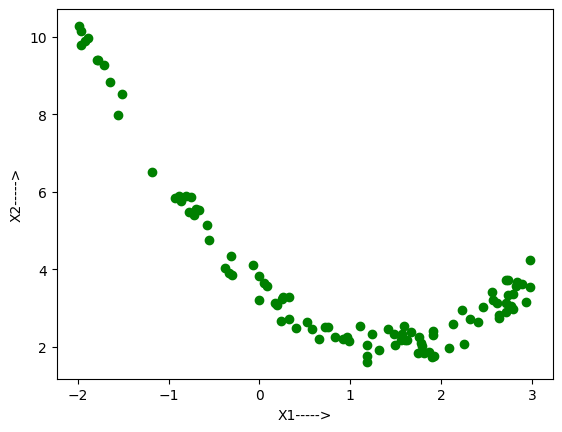

In [50]:
plt.scatter(x1,x2,color='green')
plt.xlabel('X1----->')
plt.ylabel('X2----->')
plt.show()

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [54]:
def build_model(alpha,x1,x2):
  pipe = Pipeline(steps=[('trf1',PolynomialFeatures(degree=16)),('trf2',Ridge(alpha=alpha))])
  pipe.fit(x1,x2)
  return pipe.predict(x1)

In [63]:
alphas = [0,20,100]
cs = ['red','blue','black']

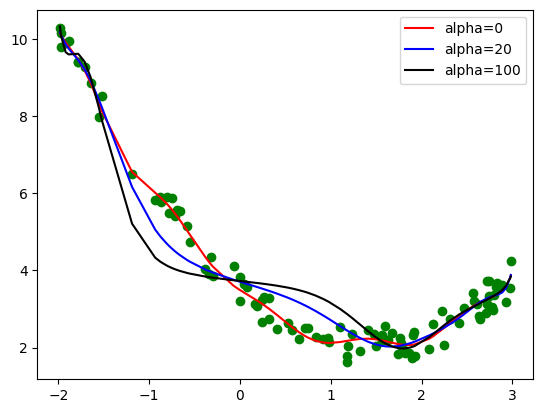

In [64]:
plt.scatter(x1,x2,color='green')
for alpha, c in zip(alphas,cs):
  pred = build_model(alpha, x1, x2)
  plt.plot(sorted(x1[:,0]),pred[np.argsort(x1[:,0])], color=c,label=f"alpha={alpha}")
plt.legend()
plt.show()

notice underfitting , optimal , overfitting